## SIRC - a modified SIR with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths)
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:<br>
$\frac{dS}{dt} = -\alpha S I$<br>,
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I$,<br>
$\frac{dC}{dt} = k I$.

## SIRSC - a SIR model without antigen and with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The major feature of this model is conversion of some or recovered back into succeptible.

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $r_s$ is the ratio of recovered people who are succeptible again,
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:
$\frac{dS}{dt} = -\alpha S I + r_s R$,<br>
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I - r_s R$,<br>
$\frac{dC}{dt} = k I$.

## SEIRC - a modified SEIR with explicit confirmed cases
The second model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model): 
- **S** is *Succeptible*
- **E** is *Exposed*, infected people, who are not yet infectious
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $e_r$ models how many exposed recover wthout becoming infectious,
- $e_i$ models how many exposed become infectious,
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:<br>
$\frac{dS}{dt} = -\alpha S I$,<br>
$\frac{dE}{dt} = \alpha S I - (e_r + e_i) E$,<br>
$\frac{dI}{dt} = e_i E - \beta I - k I$, <br>
$\frac{dR}{dt} = e_r E + \beta I$,<br>
$\frac{dC}{dt} = k I$.


In [1]:
country  = 'Iran'
country2 = 'Iran, Islamic Rep.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
#import pymc as pm
from scipy.integrate import odeint
from concurrent import futures

%matplotlib inline

In [3]:
import corona

CovidModel_Recovered


# SIRS model with confirmed cases

Progress: [####################] 100.0% 0.00011242956075734506
R0: 1: 1.06
R0: 2: 1.06
R0: 3: 1.06
R0: 4: 1.05
R0: 5: 1.07
R0: 6: 1.04
R0: 7: 1.09
R0: 8: 1.09
R0: 9: 1.04
R0: 10: 1.08


,alpha,beta,confirmed,r_s,i0,R0,Precision
0,2.05,1.94,0.0163,0.0208,6798,1.06,0.000112
1,1.99,1.88,0.0152,0.0211,7272,1.06,0.000113
2,2.07,1.95,0.0202,6.16e-07,4846,1.06,0.000115
3,2.02,1.93,0.0247,9.78e-07,6091,1.05,0.00012
4,1.75,1.63,0.0139,4.21e-07,6573,1.07,0.000121
5,2.04,1.96,0.0276,0.00408,6815,1.04,0.000156
6,1.92,1.76,0.00493,0.102,8180,1.09,0.000184
7,1.73,1.59,0.00959,0.0103,5440,1.09,0.000187
8,2.08,2,0.0287,0.0233,8038,1.04,0.000211
9,2.12,1.97,0.0126,0.0135,3012,1.08,0.000227


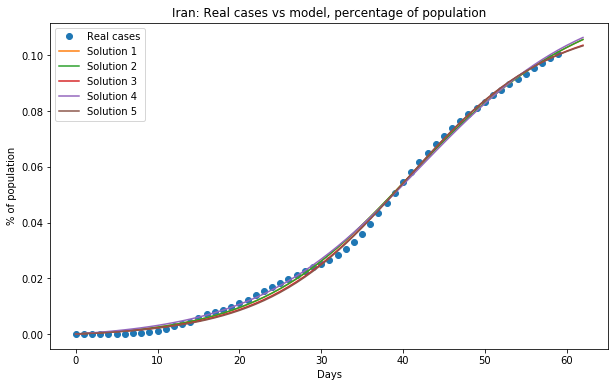

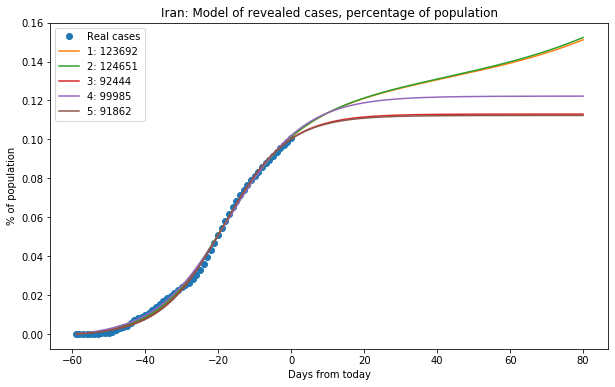

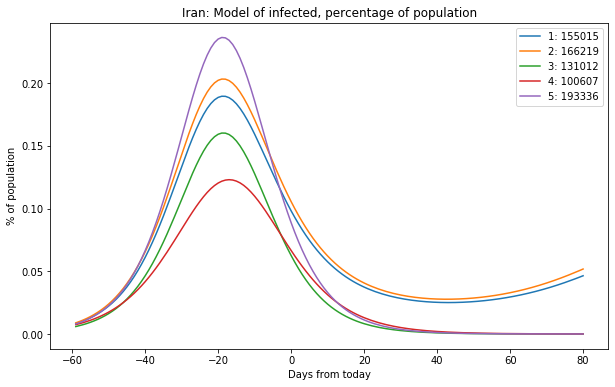

In [4]:
test_sirsc = corona.CovidModel(country, country2, model='sirsc')
test_sirsc.run(1000)

# SIR model with confirmed cases

In [5]:
test_sirc = corona.CovidModel(country, country2, model='sirc')

In [6]:
test_sirc.population, test_sirc.data[0]

(81800269.0,
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     2,     5,    18,    28,    43,    61,    95,   139,
          245,   388,   593,   978,  1501,  2336,  2922,  3513,  4747,
         5823,  6566,  7161,  8042,  9000, 10075, 11364, 12729, 13938,
        14991, 16169, 17361, 18407, 19644, 20610, 21638, 23049, 24811,
        27017, 29406, 32332, 35408, 38309, 41495, 44605, 47593, 50468,
        53183, 55743, 58226, 60500, 62589, 64586, 66220, 68192, 70029,
        71686, 73303, 74877, 76389, 77995, 79494, 80868, 82211]))

Progress: [####################] 100.0% 0.00010620512680647441
R0: 1: 1.05
R0: 2: 1.05
R0: 3: 1.05
R0: 4: 1.05
R0: 5: 1.05
R0: 6: 1.05
R0: 7: 1.05
R0: 8: 1.05
R0: 9: 1.06
R0: 10: 1.06


,alpha,beta,confirmed,i0,R0,Precision
0,2.11,2,0.0229,5172,1.05,0.000106
1,2.11,2,0.0229,5172,1.05,0.000106
2,2.11,2,0.0229,5172,1.05,0.000106
3,2.11,2,0.0229,5173,1.05,0.000106
4,2.1,1.99,0.0227,5215,1.05,0.000106
5,2.09,1.99,0.0226,5242,1.05,0.000106
6,2.07,1.97,0.0222,5347,1.05,0.000106
7,2.07,1.96,0.0222,5354,1.05,0.000106
8,2.04,1.93,0.0214,5531,1.06,0.000106
9,2.03,1.92,0.0212,5576,1.06,0.000106


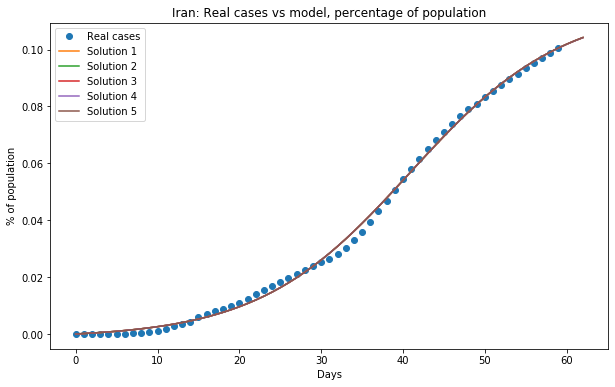

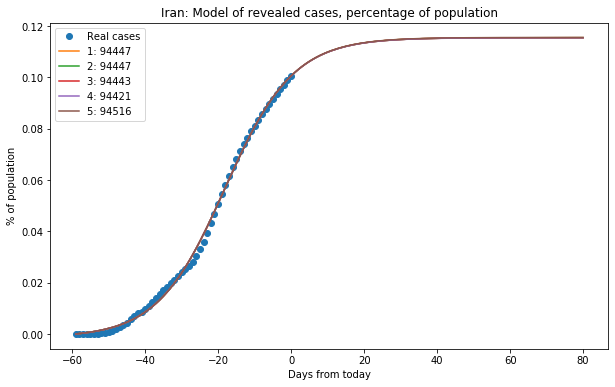

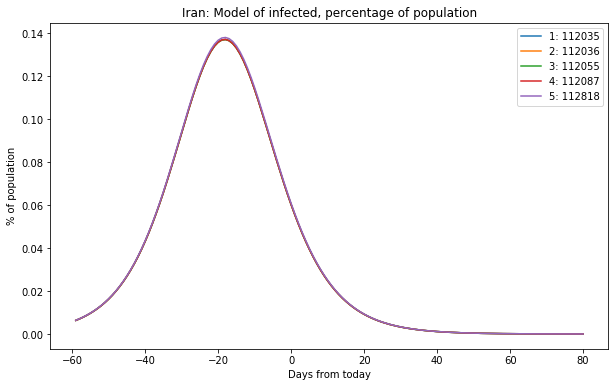

In [7]:
test_sirc.run(1000, figsize=(10, 6))

# SEIRS model with confirmed cases

Progress: [####################] 100.0% 0.00023318050286821496
R0: 1: 331.91
R0: 2: 242.59
R0: 3: 75.13
R0: 4: 68.46
R0: 5: 87.39
R0: 6: 33.31
R0: 7: 25.49
R0: 8: 41.38
R0: 9: 52.82
R0: 10: 31.75


,alpha,beta,exposed to infected,exposed to recovered,recovered to succeptible,confirmed,i0,e0,R0,Precision
0,3.32,0.01,0.453,0.538,0.131,3.48e-05,87,391,332,0.000233
1,3.36,0.0139,0.495,0.886,0.605,2.92e-05,392,154,243,0.000237
2,4.09,0.0544,0.262,0.473,0.172,5.74e-05,439,366,75.1,0.000245
3,2.85,0.0416,0.29,0.2,0.489,3.44e-05,818,103,68.5,0.000251
4,3.66,0.0419,0.474,0.9,0.993,3.15e-05,295,337,87.4,0.000253
5,2.75,0.0826,0.637,1,0.253,5.54e-05,140,721,33.3,0.000255
6,2.79,0.109,0.562,1,0.286,6.56e-05,701,190,25.5,0.000256
7,3.24,0.0782,0.553,0.96,0.708,3.88e-05,434,300,41.4,0.000256
8,2.68,0.0507,0.355,0.281,0.851,3.34e-05,673,136,52.8,0.000256
9,5,0.157,0.228,0.472,0.611,7.1e-05,285,283,31.8,0.000257


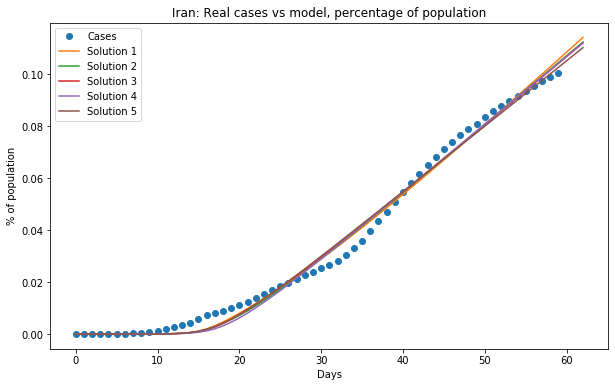

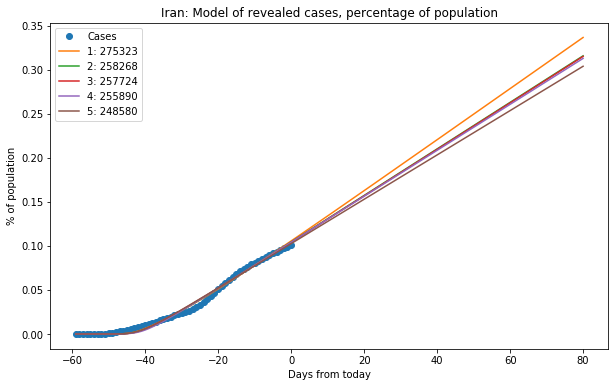

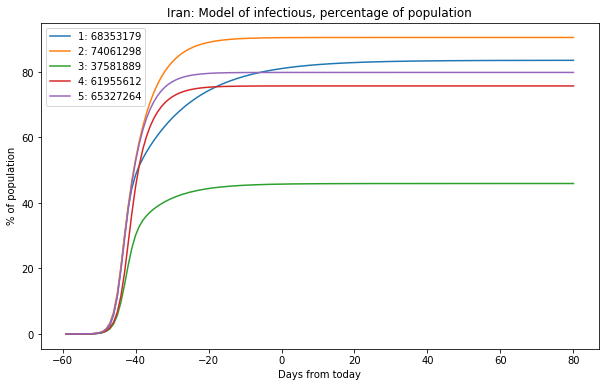

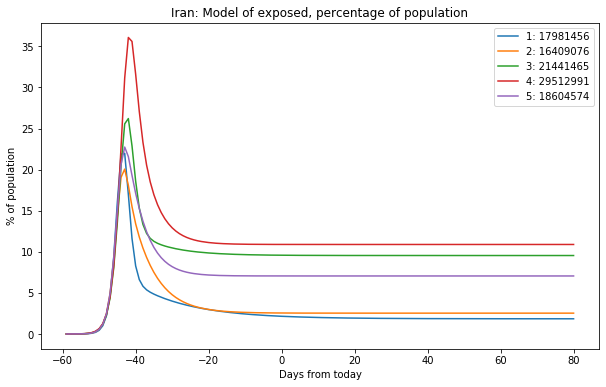

In [8]:
test_seirsc = corona.CovidModel_SEIRC(country, country2, model='seirsc')
test_seirsc.run(1000)